# I] Import functions and options

In [3]:
import pandas, numpy, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
import statsmodels.sandbox.stats.multicomp
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 
                            'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(12, 8)})
from matplotlib_venn import venn2
from statsmodels.sandbox.stats.multicomp import multipletests

In [4]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'

In [5]:
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] Data download

In [8]:
%%time
# DL data ATG7 isoform expression
path = output_file_directory + "ATG7/TCGA_GTEX/all_tissues/"
path2 = 'dataframes_for_input/'
df_ATG7_Normal = pandas.read_csv(path+path2+'df_ATG7_Normal_all.csv', sep = ",")

#remove Survival information
df_ATG7_Normal.drop(df_ATG7_Normal.columns[[3, 4]], axis = 1, inplace = True)

print(df_ATG7_Normal.shape)
df_ATG7_Normal.head(2)

(7401, 20)
Wall time: 44.4 ms


,sample,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ATG7_3,ATG7_total,ATG7_1tpm,ATG7_2tpm,ATG7_3tpm,log2_p1_ATG7_total,log2_p1_ATG7_1,log2_p1_ATG7_2,ATG7_prot_tot,ATG7_1perc,ATG7_2perc,ATG7_3perc,ATG7_1norm,ATG7_2norm
0,GTEX-ZTTD-0326-SM-57WFW,Normal Tissue,Muscle,5.042,3.860,2.390,0.2642,32.944283,14.519306,5.240574,1.199970,5.085097,3.955992,2.641679,20.95985,69.271996,25.002916,5.725088,0.440723,0.159074
1,GTEX-PX3G-1626-SM-2S1PT,Normal Tissue,Muscle,4.252,2.322,1.956,1.1320,19.052710,4.999249,3.878848,2.190624,4.325725,2.584782,2.286540,11.06872,45.165557,35.043325,19.791118,0.262390,0.203585


In [9]:
df_ATG7_Normal.Primary_Site.value_counts()

Brain              1152
Esophagus           653
Blood Vessel        606
Skin                556
Adipose Tissue      515
Muscle              396
Heart               377
Blood               337
Colon               308
Lung                288
Thyroid             279
Nerve               278
Breast              179
Stomach             174
Pancreas            167
Testis              165
Adrenal Gland       128
Liver               110
Pituitary           107
Prostate            100
Spleen              100
Small Intestine      92
Ovary                88
Vagina               85
Uterus               78
Salivary Gland       55
Kidney               28
Name: Primary_Site, dtype: int64

# III] ATG7 expression per tissues

## A) ATG7 isoform percentage

In [10]:
#heatmap data preparation
data = df_ATG7_Normal
info = 'normal_tissue'

##select columns
df_sampletype_normal = data[['Primary_Site',
                         'ATG7_total',
                         'ATG7_1tpm',
                         'ATG7_2tpm',
                         'ATG7_1perc',
                         'ATG7_2perc',
                         'ATG7_3perc']]

##Column rename
df_sampletype_normal = df_sampletype_normal.rename(columns = {'Primary_Site' : 'Primary Site', 
                                                'ATG7_total': 'tpm ATG7',
                                                'ATG7_1tpm': 'tpm ATG7(1)',
                                                'ATG7_2tpm': 'tpm ATG7(2)',
                                                'ATG7_1perc' : "% ATG7(1)",
                                                'ATG7_2perc' : "% ATG7(2)",
                                                'ATG7_3perc' : "% ATG7(3)"})

##Groupby to have merge of all the primary site 
df_sampletype_normal = df_sampletype_normal.groupby('Primary Site').agg(numpy.mean)
df_sampletype_normal = df_sampletype_normal.round(2)

##save_df in a list
print(df_sampletype_normal.head())
 


                tpm ATG7  tpm ATG7(1)  tpm ATG7(2)  % ATG7(1)  % ATG7(2)  \
Primary Site                                                               
Adipose Tissue     13.21         6.71         1.54      79.11      17.60   
Adrenal Gland      11.60         6.15         1.54      79.19      17.54   
Blood              13.52         2.86         3.90      39.14      47.83   
Blood Vessel       14.23         8.21         1.16      85.68      12.05   
Brain               7.94         5.65         0.30      95.31       3.93   

                % ATG7(3)  
Primary Site               
Adipose Tissue       3.29  
Adrenal Gland        3.27  
Blood               13.04  
Blood Vessel         2.28  
Brain                0.77  


In [23]:
#heatmap data preparation
##select columns
df_sampletype = df_ATG7_Normal[['Primary_Site',
                         'ATG7_total',
                         'ATG7_1tpm',
                         'ATG7_2tpm',
                         'ATG7_1perc',
                         'ATG7_2perc',
                         'ATG7_3perc']]

##Column rename
df_sampletype = df_sampletype.rename(columns = {'Primary_Site' : 'Primary Site', 
                                                'ATG7_total': 'tpm ATG7',
                                                'ATG7_1tpm': 'tpm ATG7(1)',
                                                'ATG7_2tpm': 'tpm ATG7(2)',
                                                'ATG7_1perc' : "% ATG7(1)",
                                                'ATG7_2perc' : "% ATG7(2)",
                                                'ATG7_3perc' : "% ATG7(3)"})

##Groupby to have merge of all the primary site 
df_sampletype= df_sampletype.groupby('Primary Site').agg(numpy.mean)
df_sampletype = df_sampletype.round(2)

df_sampletype.head(7)

,tpm ATG7,tpm ATG7(1),tpm ATG7(2),% ATG7(1),% ATG7(2),% ATG7(3)
Primary Site,,,,,,
Adipose Tissue,13.21,6.71,1.54,79.11,17.60,3.29
Adrenal Gland,11.60,6.15,1.54,79.19,17.54,3.27
Blood,13.52,2.86,3.90,39.14,47.83,13.04
Blood Vessel,14.23,8.21,1.16,85.68,12.05,2.28
Brain,7.94,5.65,0.30,95.31,3.93,0.77
Breast,12.68,7.06,1.22,83.06,14.29,2.65
Colon,9.51,5.55,0.83,85.40,12.28,2.31


In [24]:
df_sampletype['total%'] = df_sampletype['% ATG7(1)'] + df_sampletype['% ATG7(2)'] + df_sampletype['% ATG7(3)']
df_sampletype

,tpm ATG7,tpm ATG7(1),tpm ATG7(2),% ATG7(1),% ATG7(2),% ATG7(3),total%
Primary Site,,,,,,,
Adipose Tissue,13.21,6.71,1.54,79.11,17.60,3.29,100.00
Adrenal Gland,11.60,6.15,1.54,79.19,17.54,3.27,100.00
Blood,13.52,2.86,3.90,39.14,47.83,13.04,100.01
Blood Vessel,14.23,8.21,1.16,85.68,12.05,2.28,100.01
Brain,7.94,5.65,0.30,95.31,3.93,0.77,100.01
Breast,12.68,7.06,1.22,83.06,14.29,2.65,100.00
Colon,9.51,5.55,0.83,85.40,12.28,2.31,99.99
Esophagus,10.73,5.53,1.46,78.06,18.16,3.78,100.00
Heart,4.56,2.23,0.58,78.86,17.56,3.58,100.00


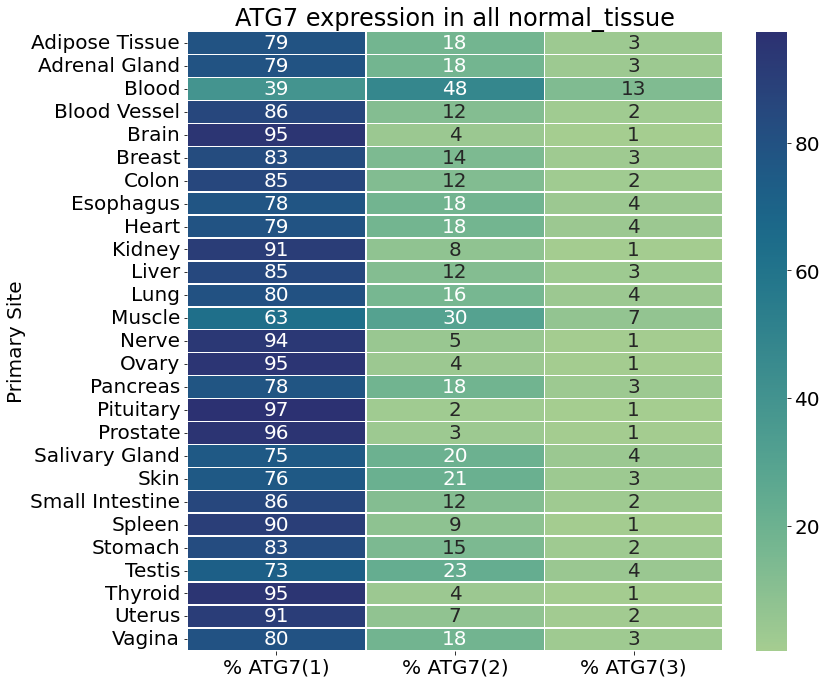

In [28]:
#heatmap percentage
info = 'normal_tissue'

HeatMap_df_sampletype = df_sampletype[['% ATG7(1)', '% ATG7(2)', '% ATG7(3)']]
heatmap = seaborn.heatmap(HeatMap_df_sampletype, annot=True, cmap="crest", linewidths=.5,
                          xticklabels=True, yticklabels=True, fmt='.0f')
plt.title('ATG7 expression in all '+info)
plt.yticks(fontsize=20)
plt.subplots_adjust(top=1.2)

path2 = 'figs_ATG7_characterisation/'
name = 'heatmap_organs_' + info
plt.savefig(path+path2+name+'.svg')

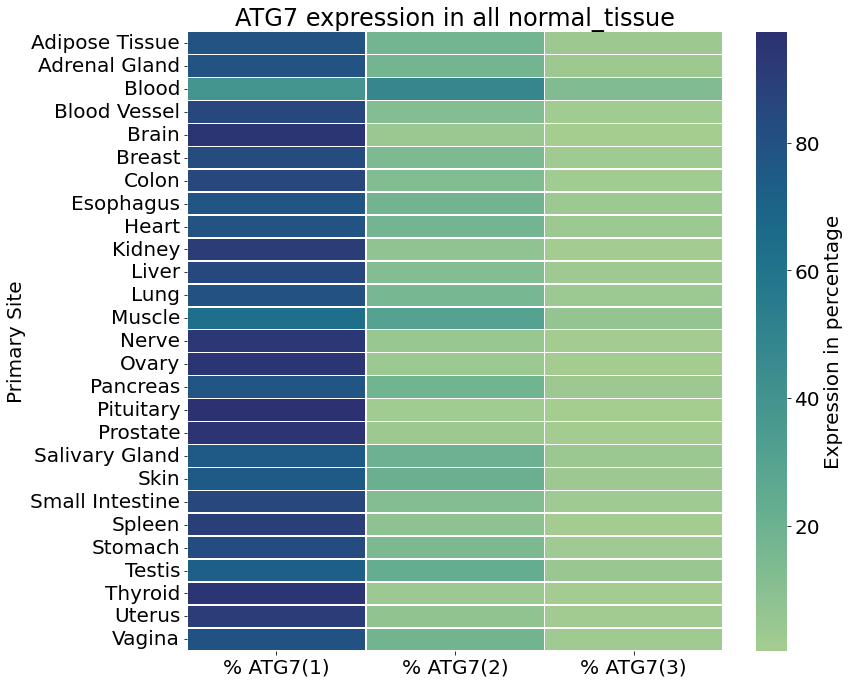

In [19]:
#heatmap percentage
info = 'normal_tissue'

HeatMap_df_sampletype_normal = df_sampletype_normal[['% ATG7(1)', '% ATG7(2)', '% ATG7(3)']]
heatmap = seaborn.heatmap(HeatMap_df_sampletype_normal, annot=False, cmap="crest", linewidths=.5,
                          xticklabels=True, yticklabels=True,
                          cbar_kws={'label': 'Expression in percentage'})
plt.title('ATG7 expression in all '+info)
plt.yticks(fontsize=20)
plt.subplots_adjust(top=1.2)

path2 = 'figs_ATG7_characterisation/'
name = 'heatmap_organs_' + info
plt.savefig(path+path2+name+'.svg')

tpm ATG7
     Primary Site  tpm ATG7
0  Adipose Tissue     13.21
1   Adrenal Gland     11.60


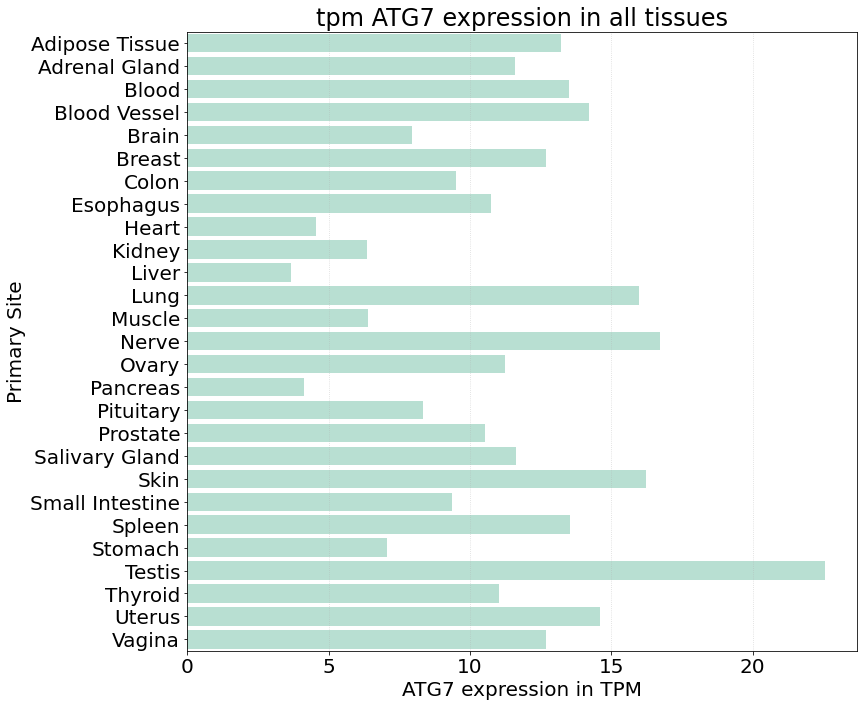

tpm ATG7(1)
     Primary Site  tpm ATG7(1)
0  Adipose Tissue         6.71
1   Adrenal Gland         6.15


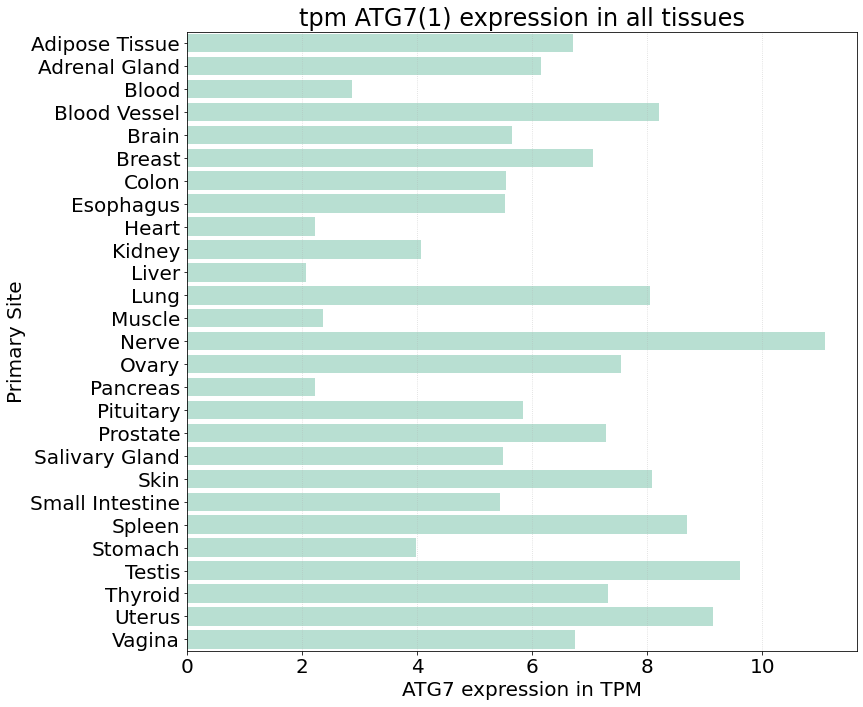

tpm ATG7(2)
     Primary Site  tpm ATG7(2)
0  Adipose Tissue         1.54
1   Adrenal Gland         1.54


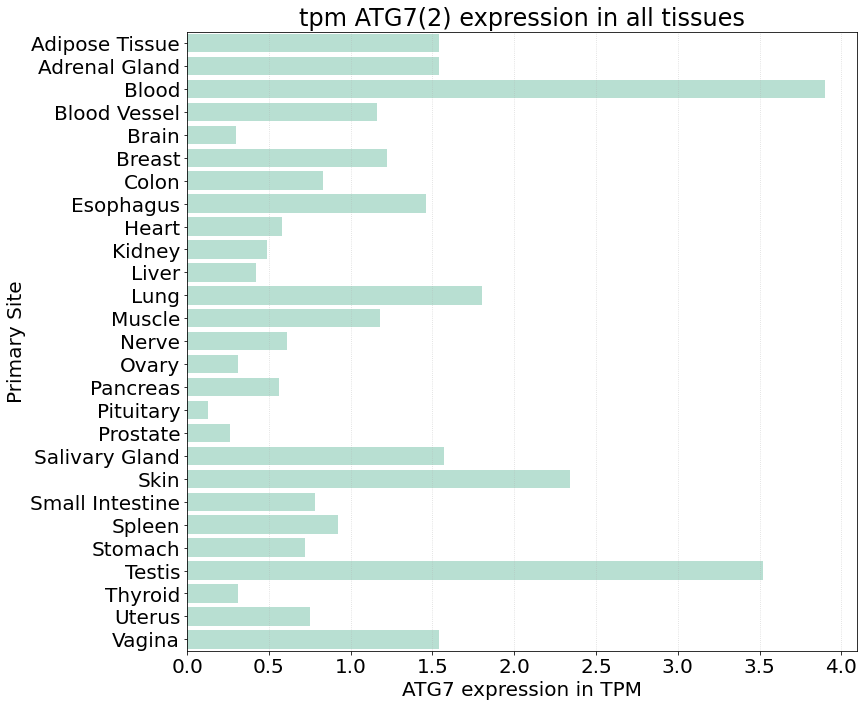

<Figure size 864x576 with 0 Axes>

In [15]:
isoforms = 'tpm ATG7', 'tpm ATG7(1)', 'tpm ATG7(2)'
color_ = 'mediumaquamarine'

for isoform in isoforms:
    print(isoform)

    hist_df = df_sampletype_normal.reset_index()
    hist_df = hist_df[['Primary Site', isoform]]
    print(hist_df.head(2))

    # Seaborn
    seaborn.barplot(data = hist_df, x =  isoform, y = 'Primary Site', alpha=0.5, color = color_)
    plt.title(isoform +' expression in all tissues')
    plt.xlabel('ATG7 expression in TPM')
    plt.subplots_adjust(top=1.2)
    plt.yticks(fontsize=20)

    name = 'histo_organs_'
    #     plt.savefig(path+path2+name+'.svg')
    plt.show()
    plt.clf()